
**Module 5 - Assignment 5**
- Student: Jessa Gariepy
- Instructor: Professor Li
- Class: GIS 322
- Date: 04/06/2021

---



First, import all the needed modules:

In [1]:
# Import needed modules.

!pip install geopandas
!sudo apt install python3-rtree

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas.tools import geocode
import pygeos
import rtree

%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


The following line of code was utilized as a recommendation from a classmate that was also having issues with an ImportModule Error. The code install the most updated version of geopandas

In [46]:
!pip install git+git://github.com/geopandas/geopandas.git


  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-1603g6ie
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-1603g6ie
  Created wheel for geopandas: filename=geopandas-0.9.0+10.g37ffc35-py2.py3-none-any.whl size=995145 sha256=db5d4680c17e375a7371cf6e672f8f240ccbc02847e84c4670c0db5ac4ecbab3
  Stored in directory: /tmp/pip-ephem-wheel-cache-_untyr_g/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
  Found existing installation: geopandas 0.9.0
    Uninstalling geopandas-0.9.0:
      Successfully uninstalled geopandas-0.9.0


## Step 1: Import the data into Python using the proper function.

*starbucks* is name of all Starbucks stores in Arizona.
*az_zips* is shapefile file of all Arizona zip codes.

After files are imported, the files are viewed using the head() function.

In [2]:
# Step 1: Import the data into Python using the proper function

starbucks = pd.read_csv("/content/starbucks_address.csv")
az_zips = gpd.read_file("/content/AZ_zipcodes.shp")

starbucks.head()

,Brand,Store Name,Street Address,City,State/Province,Country
0,Starbucks,Fry's #78 Anthem,39508 N. Daisy Mountain Drive,Anthem,AZ,US
1,Starbucks,"Anthem & I-17, Anthem",3640 W. Anthem Way,Anthem,AZ,US
2,Starbucks,Daisy Mountain & Gavilan Peak,"39504 N. Daisy Mountain Drive, #118",Anthem,AZ,US
3,Starbucks,"Fry's-Apache Junction, AZ #65",185 W Apache Tr,Apache Junction,AZ,US
4,Starbucks,Apache Trail & Delaware,2580 W. Apache Trail,Apache Junction,AZ,US


In [3]:
az_zips.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Zipcode,geometry
0,85019,85019,B5,G6350,S,9713482,16770,+33.5088785,-112.1445137,85019,"POLYGON ((-112.15154 33.51432, -112.15153 33.5..."
1,85020,85020,B5,G6350,S,23027500,65264,+33.5673508,-112.0535909,85020,"POLYGON ((-112.03919 33.59392, -112.03904 33.5..."
2,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5..."
3,85022,85022,B5,G6350,S,24230483,4009,+33.6272400,-112.0484143,85022,"POLYGON ((-112.07416 33.64750, -112.07416 33.6..."
4,85023,85023,B5,G6350,S,18927812,18972,+33.6341180,-112.0931632,85023,"POLYGON ((-112.11518 33.64381, -112.11501 33.6..."


## Step 2: Geocode each of Starbucks address to longitude and latitude.


- The for loop is designed to go through each entry within the starbucks dataframe and to combine the street address, city, and state into one column named "address".

- Then, geocoding is finalized and each geocoded starbucks location is placed in starbucks_loc GeoDataFrame.


In [5]:
# Step 2: Geocode each of the Starbucks address to longitude and latitude.
# Hints: Use loops and concatenate each address with city/state names
# KEY = AswUwe1UpCxEOAzwfwDwZn5IjWPKhTFLsqXMsV4HTRcIX2zO88Nv6R8LwXiOfIMB

# Loop 1: To create a concatenated version of each SB address
for i in starbucks:
  starbucks['Address'] = starbucks['Street Address'] + " " + starbucks['City'] + " " + starbucks['State/Province']

# Get the longtiude and latitude of each location. 
starbucks_loc = gpd.tools.geocode(starbucks["Address"], provider = 'bing', api_key = 'AswUwe1UpCxEOAzwfwDwZn5IjWPKhTFLsqXMsV4HTRcIX2zO88Nv6R8LwXiOfIMB')


In [6]:
#Check to make sure it worked properly
starbucks_loc.head()

,geometry,address
0,POINT (-112.13369 33.84443),"39508 N Daisy Mountain Dr, Anthem, AZ 85086, U..."
1,POINT (-112.13671 33.86698),"3640 W Anthem Way, Anthem, AZ 85086, United St..."
2,POINT (-112.13490 33.84352),"39504 N Daisy Mountain Dr, Anthem, AZ 85086, U..."
3,POINT (-111.54937 33.41263),"185 W Apache Tr, Apache Junction, AZ 85120, Un..."
4,POINT (-111.57413 33.41596),"2580 W Apache Trail, Apache Junction, AZ 85120..."


- The following code is used to determine the coordinate reference system (CRS) for each data frame. Then, the starbucks_loc GDF is converted to the same CRS that az_zips has.

In [7]:
#find CRS of Arizona Zip code data = 4269
az_zips.crs


<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [8]:
#find CRS of starbucks GDF = 4326
starbucks_loc.crs

starbucks_loc= starbucks_loc.to_crs(epsg ='4269')

starbucks_loc.crs



<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

## Step 3: Import the zipcode boundary map into Python

The following code simply visualizes the zipcode data from az_zips (a shapefile).

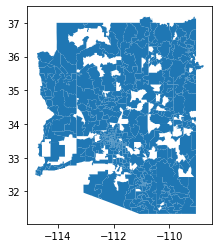

In [79]:
#Step 3: Import the zipcode boundary map into Python 
az_zips.plot() 


## Step 4: Count number of Starbuck locations within each zip code using proper "spatial overlay" function.

- The following code performs a spatial merge between the az_zips GeoDataFrame and starbucks_loc GeoDataFrame.
- Index from az_zips is used for the new GDF, and the attributes are joined depending on if Starbucks locations fully contained in zipcodes.

- The count is performed using the groupby() function. For each zipcode, it counts the number of Starbuck addresses contained within.

In [42]:
#Step 4: Count the number of Starbuck location within each zip code using proper
# "spatial overlay" function


starbucks_zips_merged = gpd.sjoin(az_zips,starbucks_loc, how = 'left', op = 'contains')

#The number of Starbuck locations within each zipcode.
sb_by_zip = starbucks_zips_merged.groupby("Zipcode").count()[["address"]]
print(sb_by_zip)

         address
Zipcode         
85003          1
85004          5
85006          0
85007          1
85008          4
...          ...
86540          0
86544          0
86545          0
86547          0
86556          0

[405 rows x 1 columns]


In [43]:
starbucks_zips_merged.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Zipcode,geometry,index_right,address
0,85019,85019,B5,G6350,S,9713482,16770,+33.5088785,-112.1445137,85019,"POLYGON ((-112.15154 33.51432, -112.15153 33.5...",NaN,NaN
1,85020,85020,B5,G6350,S,23027500,65264,+33.5673508,-112.0535909,85020,"POLYGON ((-112.03919 33.59392, -112.03904 33.5...",219.0,"810 E Glendale Ave, Phoenix, AZ 85020, United ..."
2,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5...",213.0,"1815 W Glendale Ave, Phoenix, AZ 85021, United..."
2,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5...",285.0,"2360 W Northern Ave, Phoenix, AZ 85021, United..."
3,85022,85022,B5,G6350,S,24230483,4009,+33.6272400,-112.0484143,85022,"POLYGON ((-112.07416 33.64750, -112.07416 33.6...",273.0,"13240 N 7th St, Phoenix, AZ 85022, United States"


In [69]:
#Here, we do an attribute merge of the total number of Starbucks in each zipcode (sb_by_zip) and GDF (starbucks_zips_merged)

merged_starbucks_total = pd.merge(starbucks_zips_merged, sb_by_zip,
                             left_on= "Zipcode", right_on = 'Zipcode')

In [70]:
merged_starbucks_total.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Zipcode,geometry,index_right,address_x,address_y
0,85019,85019,B5,G6350,S,9713482,16770,+33.5088785,-112.1445137,85019,"POLYGON ((-112.15154 33.51432, -112.15153 33.5...",NaN,NaN,0
1,85020,85020,B5,G6350,S,23027500,65264,+33.5673508,-112.0535909,85020,"POLYGON ((-112.03919 33.59392, -112.03904 33.5...",219.0,"810 E Glendale Ave, Phoenix, AZ 85020, United ...",1
2,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5...",213.0,"1815 W Glendale Ave, Phoenix, AZ 85021, United...",2
3,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5...",285.0,"2360 W Northern Ave, Phoenix, AZ 85021, United...",2
4,85022,85022,B5,G6350,S,24230483,4009,+33.6272400,-112.0484143,85022,"POLYGON ((-112.07416 33.64750, -112.07416 33.6...",273.0,"13240 N 7th St, Phoenix, AZ 85022, United States",7


In [76]:
# Change column name to be more intuitive:
merged_starbucks_total.rename(columns = {'address_y':'SB_in_zip'}, inplace = True)

In [77]:
merged_starbucks_total.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Zipcode,geometry,index_right,address_x,SB_in_zip
0,85019,85019,B5,G6350,S,9713482,16770,+33.5088785,-112.1445137,85019,"POLYGON ((-112.15154 33.51432, -112.15153 33.5...",NaN,NaN,0
1,85020,85020,B5,G6350,S,23027500,65264,+33.5673508,-112.0535909,85020,"POLYGON ((-112.03919 33.59392, -112.03904 33.5...",219.0,"810 E Glendale Ave, Phoenix, AZ 85020, United ...",1
2,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5...",213.0,"1815 W Glendale Ave, Phoenix, AZ 85021, United...",2
3,85021,85021,B5,G6350,S,17419881,74879,+33.5594209,-112.0928747,85021,"POLYGON ((-112.11569 33.56233, -112.11609 33.5...",285.0,"2360 W Northern Ave, Phoenix, AZ 85021, United...",2
4,85022,85022,B5,G6350,S,24230483,4009,+33.6272400,-112.0484143,85022,"POLYGON ((-112.07416 33.64750, -112.07416 33.6...",273.0,"13240 N 7th St, Phoenix, AZ 85022, United States",7


## Step 5: Export the zip code map with color representing numbers of Starbucks locations.

- The plot below was learned from the module 5 example code.


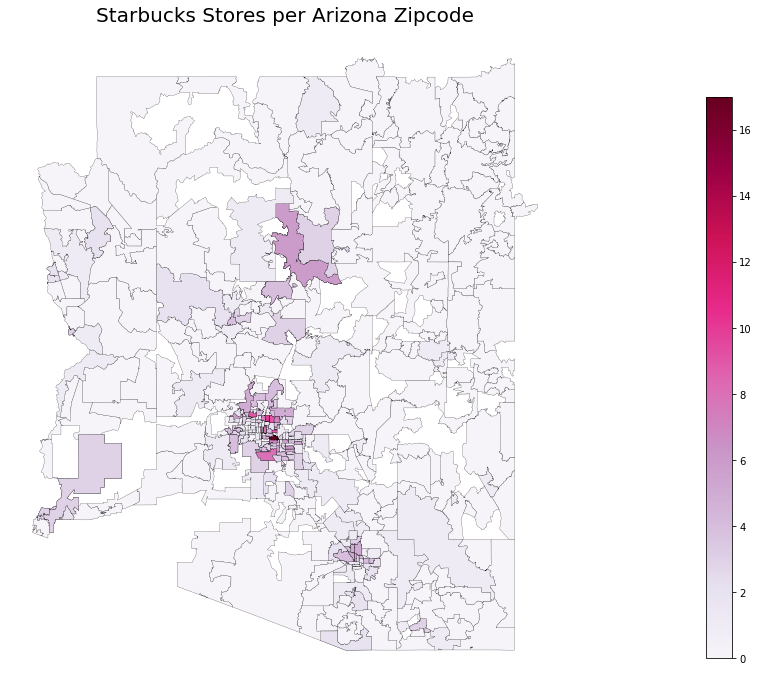

In [85]:
#Define figure size and subplot

fig, ax = plt.subplots(1, figsize=(12, 12))
merged_starbucks_total.plot(column="SB_in_zip",figsize=(10,10), ax=ax, 
                           cmap='PuRd',edgecolor='black', linewidth=0.2)

# Set the plot's title
plt.title("Starbucks Stores per Arizona Zipcode",fontsize=20)

#Prepare the legend.
vmin = merged_starbucks_total["SB_in_zip"].min()
vmax = merged_starbucks_total["SB_in_zip"].max()
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax),cmap='PuRd')
sm._A = []
cax = fig.add_axes([1, 0.15, 0.03, 0.65])
fig.colorbar(sm, cax=cax)

#Turn off the axis increments
ax.axis('off')


#Save and export image
plt.savefig("starbucks.png",dpi=400,bbox_inches='tight')

(-115.11873979999999, -108.4714662, 31.039012550000002, 37.488630449999995)

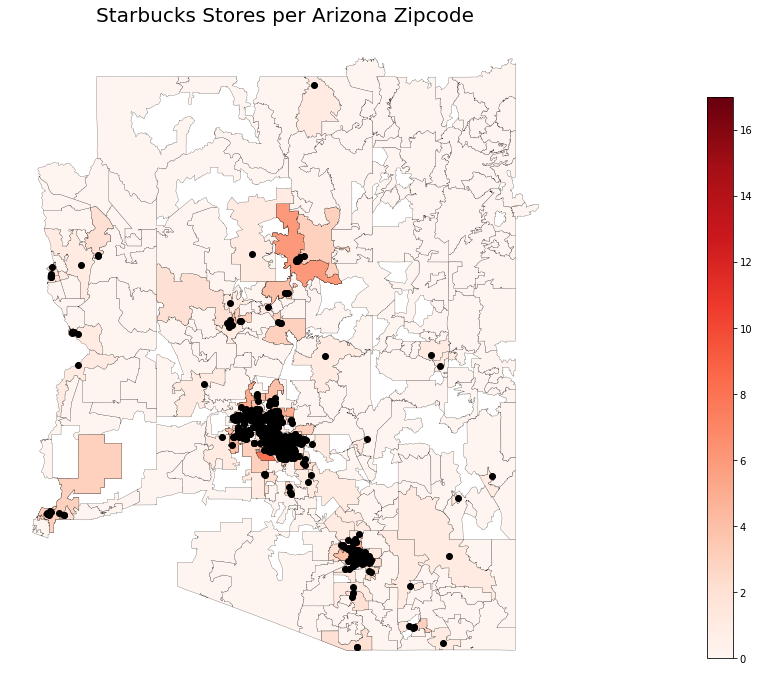

In [82]:
# This is the same map as above, except with Starbucks location pinpointed on the map.
# I was not sure if required, so I included in case.


fig, ax = plt.subplots(1, figsize=(12, 12))
merged_starbucks_total.plot(column="SB_in_zip",figsize=(10,10), ax=ax, 
                           cmap='Reds',edgecolor='black', linewidth=0.2)
starbucks_loc.plot(ax=ax,color="black")

# Set the plot's title
plt.title("Starbucks Stores per Arizona Zipcode",fontsize=20)

#Prepare the legend.
vmin = merged_starbucks_total["SB_in_zip"].min()
vmax = merged_starbucks_total["SB_in_zip"].max()
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax),cmap='Reds')
sm._A = []
cax = fig.add_axes([1, 0.15, 0.03, 0.65])
fig.colorbar(sm, cax=cax)

#Turn off the axis increments
ax.axis('off')
